**Titanic Dataset**

Import Data and Required Packages

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

Show Top 5 Records

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Show last 5 records

In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Understand Structure & Data Types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Statistical Summary of Numerical Columns

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Check Missing Values

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Check Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

Number of Unique Values

In [9]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Define numerical & categorical columns and Identify binary and ordinal features

In [10]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

binary_features = [
    feature for feature in df.columns 
    if df[feature].nunique() == 2
]

ordinal_features = [
    'parental_level_of_education'
]

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))
print(f"\nWe have {len(ordinal_features)} Ordinal Features:\n", ordinal_features)
print(f"\nWe have {len(binary_features)} Binary Features:\n", binary_features)

We have 7 numerical features : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

We have 5 categorical features : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

We have 1 Ordinal Features:
 ['parental_level_of_education']

We have 2 Binary Features:
 ['Survived', 'Sex']


Target Variable

In [11]:
'Survived'

'Survived'

Input Features

In [12]:
'PassengerId'
'Pclass'
'Name'
'Sex'
'Age'
'SibSp'
'Parch'
'Ticket'
'Fare'
'Cabin'
'Embarked'

'Embarked'

Size of Dataset

In [13]:
df.shape

(891, 12)

Identifying missing values

In [14]:
# Calculate
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Age         177
Cabin       687
Embarked      2
dtype: int64

Visualize missind data patterns

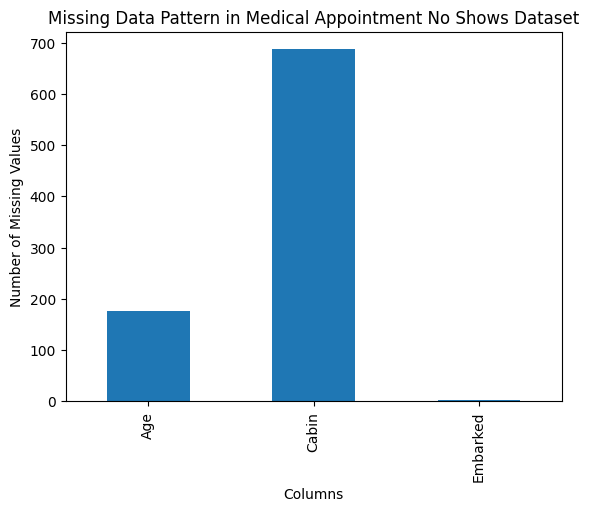

In [17]:
# Plot bar chart
plt.figure()
missing_values.plot(kind='bar')
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Data Pattern in Medical Appointment No Shows Dataset")
plt.show()

Applying Mean Imputation

In [18]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

Applying Median Imputation

In [19]:
# Apply median imputation (robust to outliers)
df[numerical_columns] = df[numerical_columns].fillna(
    df[numerical_columns].median()
)

In [20]:
# Verify missing values
df[numerical_columns].isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

Applying mode imputation for categorical columns

In [21]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [22]:
# Apply mode imputation
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [23]:
# Verify missing values
df[categorical_columns].isnull().sum()

Name        0
Sex         0
Ticket      0
Cabin       0
Embarked    0
dtype: int64

Remove unnecessary columns

In [24]:
# Drop columns that don't help prediction
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Encode categorical features (OneHotEncoding)

In [25]:
from sklearn.preprocessing import OneHotEncoder

# Separate features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [26]:
# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [27]:
X.shape

(891, 8)

Apply StandardScaler to numeric columns

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,-0.565736,1,0,-0.502445,True,False,True
1,1,0.663861,1,0,0.786845,False,False,False
2,3,-0.258337,0,0,-0.488854,False,False,True
3,1,0.433312,1,0,0.420730,False,False,True
4,3,0.433312,0,0,-0.486337,True,False,True


Train-test split (maintain class distribution)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape

((712, 8), (179, 8))

Train Logistic Regression & predict

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0])

Evaluation Metrics + Confusion Matrix

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)

Accuracy : 0.8044692737430168
Precision: 0.7931034482758621
Recall   : 0.6666666666666666
F1 Score : 0.7244094488188977


Confusion Matrix

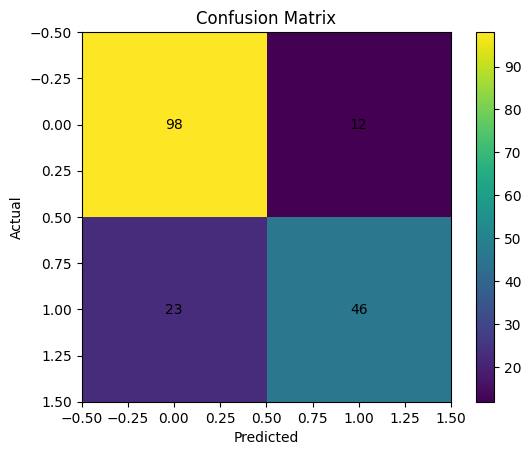

In [33]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.show()


ROC Curve & AUC Score

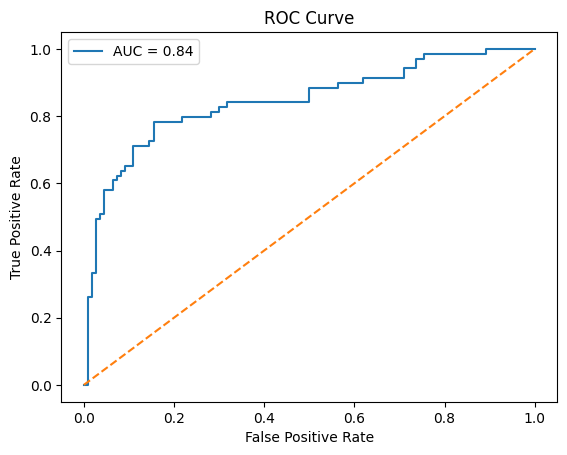

AUC Score: 0.844532279314888


In [34]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("AUC Score:", roc_auc)
y = df['Survived']